In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
pd.__version__

'2.1.1'

## Konjunkturstatistik über Warengruppen im Lebensmitteleinzelhandel
Die experimentelle Konjunkturstatistik über Warengruppen bietet wöchentliche Einblicke in die Konsumgewohnheiten der Bevölkerung bei Lebensmitteln.  
Die Konjunkturstatistik steht jeden zweiten Freitag aktualisiert zum [Download](https://www.destatis.de/DE/Service/EXSTAT/Datensaetze/warengruppen-einzelhandel.html) bereit.

In [3]:
# high frequency data from 
# https://www.destatis.de/DE/Service/EXSTAT/Datensaetze/warengruppen-einzelhandel.html
scanWeekly = pd.read_csv("scandata/weekly/warengruppen_0111_10_steller_2024_kw6.csv", sep=";", decimal=",")

In [8]:
# 10 digit COICOP 0111201100 => Weizenmehl (wheat flour)
scanWeekly[["Woche_ID", "Absatzindex_0111201100"]]

,Woche_ID,Absatzindex_0111201100
0,202101,91.0
1,202102,100.2
2,202103,99.4
3,202104,97.5
4,202105,101.3
...,...,...
157,202402,83.7
158,202403,82.7
159,202404,94.1
160,202405,88.3


In [5]:
scanWeekly["year"]=scanWeekly["Woche_ID"].apply(lambda x: str(x)[0:4])
scanWeekly["week"]=scanWeekly["Woche_ID"].apply(lambda x: str(x)[4:6]).astype("int")

In [11]:
scanData2021 = scanWeekly[scanWeekly["year"]=="2021"]
scanData2022 = scanWeekly[scanWeekly["year"]=="2022"]
scanData2023 = scanWeekly[scanWeekly["year"]=="2023"]
scanData2024 = scanWeekly[scanWeekly["year"]=="2024"]

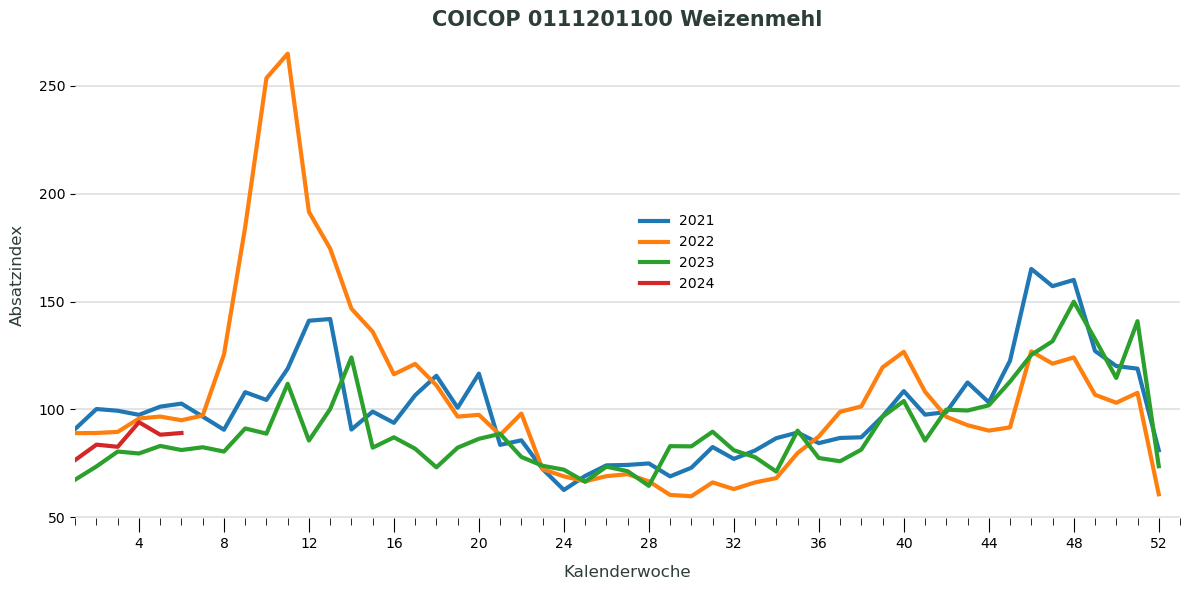

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title("COICOP 0111201100 Weizenmehl", pad=4, size=15, color="#2C3E35", fontweight='bold')
ax.set_xlabel(xlabel='Kalenderwoche', labelpad=10, size=12, color="#2C3E35")
ax.set_ylabel(ylabel='Absatzindex', labelpad=10, size=12, color="#2C3E35")

ax.xaxis.set_major_locator(MultipleLocator(4))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.tick_params(axis='x', which='major', length=10, labelsize=10)
ax.tick_params(axis='x', which='minor', length= 5, labelsize=8)

ax.set_xlim(1,53)
ax.grid(which='major', axis='y', color='#666', linewidth=0.25)
    
plt.plot(scanData2021["week"], scanData2021["Absatzindex_0111201100"], label="2021", linewidth=3)
plt.plot(scanData2022["week"], scanData2022["Absatzindex_0111201100"], label="2022", linewidth=3)
plt.plot(scanData2023["week"], scanData2023["Absatzindex_0111201100"], label="2023", linewidth=3)
plt.plot(scanData2024["week"], scanData2024["Absatzindex_0111201100"], label="2024", linewidth=3)

ax.legend(loc="upper left", bbox_to_anchor=(.5, .65), facecolor="white", edgecolor="none")

plt.box(False)
plt.tight_layout()    
plt.savefig("Absatzindex_0111201100_Weizenmehl_2024kw6.png")
plt.show()